### <center> (Practical Research Track) The Influence of Dimensionality Reduction on the classification accuracy of Titanic Problem</center>
    
### <center> Akylbek Maxutov <center>

#### ABSTRACT

There are can be different ways of solving the same problem using a variety of approaches that machine learning could offer. Classification problems are mostly solved by state-of-the-art algorithms. However, if the data present is in high dimension, it could be reduced by using known Dimensionality Reduction techniques and the reduction will allow visualizing the data, subsequently having influenced the final decision. To test this assumption non-linear dimensionality reduction techniques were used. As a problem Titanic dataset from the Kaggle platform was chosen. After implementation of the data of Titanic problem, the spread of data over the space was visualized that the final accuracy obtained after dimensionality reduction was not output that promising results.

#### INTRODUCTION

The main idea that lies behind Data Science is to help businesses through the study of gathered data.[1] It could be data related to customers, purchases, sales, or even activities during the holiday periods. However, the systematical research of data also could be beneficial for the Government Institutions, Educational Organizations, and Healthcare centers, because each Institute gathers information related to exactly one domain aspect, and the insights found in data could illustrate the behavior of a customer, student, or a patient. There is a platform, named Kaggle, which is assumed to be one of the main platforms to practice data science problems, and there is a beginner-friendly dataset, called Titanic [2]. As the name says, this dataset consists of information regarding each passenger who was on the ship on the day of disaster and the recording about could this person survive or not [2],[3],[4]. 

The advantage of the Titanic dataset is in the fact that it allows testing different hypotheses using a variety of machine learning concepts. As the problem is of binary classification, here the performance of a list of classification algorithms can be illustrated. And that is what exactly Ekinci et al. [2] did. In their research, they compared the accuracy rate of Gradient Boosting, Random Forest, ANN, AdaBoost, Decision Tree, Logistic Regression, kNN, and Naïve Bayes on the prediction of survival rate of Titanic passengers on the test set. 

There are also other works devoted to the assessment of the above-mentioned algorithms on the same dataset. Nevertheless, the tools that [3] and [4] use are different, weka and R are used mainly. Interestingly, there are other enthusiasts who used absolutely different approaches in solving the problem. For example, there were cases when participants in the Kaggle platform tried to use Convolutional Neural Networks on tabular data [5], the result is not satisfactory, however, but for the experimentation, it was an interesting try. 

In this work, a completely different approach will be used. The dataset will stay the same, but for the increase of accuracy the dimensionality reduction methods will be used. To be exact the influence of t-distributed Stochastic Neighbor Embedding and kernel Principal Component Analysis in 2-d and 3-d will be compared. First, Data will be tested on four state-of-the-art algorithms: kNN, Decision Tree, Random Forest, and AdaBoost. Then the reduced dataset will be tested on the above-mentioned algorithm again, so that there will be two parallel comparisons: between kPCA and tSNE, and classification algorithms before and after dimensionality reduction. 

The work is organized in the following way; in the first part, the dataset will be prepared for further analysis. In the second part, prepared data will be analyzed using classification algorithms. The next part will be devoted to the brief introduction of tSNE and kPCA, following with its implementation. Finally, the last parts will include the overall analysis and the conclusion of the work.

#### DATA PREPARATION

Before the implementation, all the needed data should be prepared. In this section, data preprocessing will be done. The dataset will be analyzed and will be organized in the correct way. 
Below are the libraries used during the project. The dataset will be called Titanic, and only the training dataset will be used. Because the main goal of the project is not the prediction with the test dataset, instead of an exploration of how dimensionality reduction affects training data. 

In [1]:
import numpy as np 
import pandas as pd 
import re
from mpl_toolkits import mplot3d

import seaborn as sns
%matplotlib inline
import matplotlib.pyplot as plt

# Algorithms
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.neighbors import KNeighborsClassifier

from sklearn.decomposition import KernelPCA
from sklearn.manifold import TSNE

In [2]:
titanic = pd.read_csv("supplementary/train.csv")

In [3]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


At the first glance, it is seen that apart from the 'Survived' column, which is the target feature, the other 10 features include numerical and categorical data. The 'PassengerID' will be dropped immediately because it is the order of given information about passengers in a database. 'Cabin', 'Age', and 'Embarked' columns are not completely full, there are some missing data

In [4]:
print('Missed values in AGE attribute: {}, or in percent {}%'.format(str(891-714), 
                                                            str(round((891-714)/891 * 100,3))))
print('Missed values in CABIN attribute: {}, or in percent {}%'.format(str(891-204), 
                                                            str(round((891-204)/891 * 100,3))))
print('Missed values in EMBARKED attribute: {}, or in percent {}%'.format(str(891-889), 
                                                            str(round((891-889)/891 * 100,3))))

Missed values in AGE attribute: 177, or in percent 19.865%
Missed values in CABIN attribute: 687, or in percent 77.104%
Missed values in EMBARKED attribute: 2, or in percent 0.224%


Here, the 'Embarked' column can be filled easily because only 0.224% of data is missing. In this case, null values will be filled with the mode of the column. 'Age' data also can be dealt, because slightly less than 20% of data is missing. However, in the case of 'Cabin' data, almost 80% of data should be mechanically filled. 

Nevertheless, the first steps are as follows

In [5]:
titanic = titanic.drop(['PassengerId'], axis=1)
print(titanic['Embarked'].unique())
titanic['Embarked'].describe()

['S' 'C' 'Q' nan]


count     889
unique      3
top         S
freq      644
Name: Embarked, dtype: object

The 'ID' column is dropped, and to fill the 'Embarked' values, the mode is found. As it is seen, column contains only three values, expect NaN values. 'S' values seems to be frequent making the 644 of 889. Therefore, missed 2 samples will be filled as 'S'. As this feature is of categorical form, it will be converted into numerical in the following way: all 'S' in the column will be encoded as 0, 'C' and 'Q', 1 and 2 respectively

In [6]:
titanic['Embarked'] = titanic['Embarked'].fillna('S')
embarked = {'S': 0, 'C': 1, 'Q': 2}
titanic['Embarked'] = titanic['Embarked'].map(embarked)

The 'Embarked' column is prepared. Next is the 'Age' Column, obviously, missed values could be filled with the median, mean, or mode, but as 20% of data is missed, assigning the same value to 1/5 of the data might have a significant influence. Therefore, the cleaning is done as next
1. The mean and standard deviation of the column will be found.
2. The number of null values will be assigned to a variable 'null'.
3. Then random numbers between mean-std and mean+std will be generated. The size will be the number of null values. 
4. Then these randomly generated numbers will be assigned to null values of the 'Age' column.

In [7]:
mean = titanic["Age"].mean()
std = titanic["Age"].std()
null = titanic["Age"].isnull().sum()
random_age = np.random.randint(mean - std, mean + std, size = null)

copy = titanic["Age"].copy()
copy[np.isnan(copy)] = random_age
titanic["Age"] = copy
titanic["Age"] = titanic["Age"].astype(int)

77% of 'Cabin' data is absent. It could be easily dropped, but the below code shows that from the present data there can be found a pattern [LetterNumber]. Therefore only letters of 'Cabin' will be kept. But first, null values will be filled with 'N'. Then letter part from the feature will be extracted using regular expression. After that, all letters will be encoded.

In [8]:
titanic['Cabin'].unique()

array([nan, 'C85', 'C123', 'E46', 'G6', 'C103', 'D56', 'A6',
       'C23 C25 C27', 'B78', 'D33', 'B30', 'C52', 'B28', 'C83', 'F33',
       'F G73', 'E31', 'A5', 'D10 D12', 'D26', 'C110', 'B58 B60', 'E101',
       'F E69', 'D47', 'B86', 'F2', 'C2', 'E33', 'B19', 'A7', 'C49', 'F4',
       'A32', 'B4', 'B80', 'A31', 'D36', 'D15', 'C93', 'C78', 'D35',
       'C87', 'B77', 'E67', 'B94', 'C125', 'C99', 'C118', 'D7', 'A19',
       'B49', 'D', 'C22 C26', 'C106', 'C65', 'E36', 'C54',
       'B57 B59 B63 B66', 'C7', 'E34', 'C32', 'B18', 'C124', 'C91', 'E40',
       'T', 'C128', 'D37', 'B35', 'E50', 'C82', 'B96 B98', 'E10', 'E44',
       'A34', 'C104', 'C111', 'C92', 'E38', 'D21', 'E12', 'E63', 'A14',
       'B37', 'C30', 'D20', 'B79', 'E25', 'D46', 'B73', 'C95', 'B38',
       'B39', 'B22', 'C86', 'C70', 'A16', 'C101', 'C68', 'A10', 'E68',
       'B41', 'A20', 'D19', 'D50', 'D9', 'A23', 'B50', 'A26', 'D48',
       'E58', 'C126', 'B71', 'B51 B53 B55', 'D49', 'B5', 'B20', 'F G63',
       'C62 C64',

In [9]:
titanic['Cabin'] = titanic['Cabin'].fillna('N')
titanic['Cabin'] = titanic['Cabin'].str.extract('([a-zA-Z]+)', expand=False)
titanic['Cabin'].unique()

array(['N', 'C', 'E', 'G', 'D', 'A', 'B', 'F', 'T'], dtype=object)

There 9 items in the new 'Cabin' column. The logic of encoding is assigning a number to a specific letter: 
Example, {"A": 1, "B": 2, "C": 3, "D": 4, "E": 5, "F": 6, "G": 7, "N": 8, "T": 9}

In [10]:
cabin_letters = {"A": 1, "B": 2, "C": 3, "D": 4, "E": 5, "F": 6, "G": 7, "N": 8, "T": 9}
titanic['Cabin'] = titanic['Cabin'].map(cabin_letters)

In [11]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Name      891 non-null    object 
 3   Sex       891 non-null    object 
 4   Age       891 non-null    int32  
 5   SibSp     891 non-null    int64  
 6   Parch     891 non-null    int64  
 7   Ticket    891 non-null    object 
 8   Fare      891 non-null    float64
 9   Cabin     891 non-null    int64  
 10  Embarked  891 non-null    int64  
dtypes: float64(1), int32(1), int64(6), object(3)
memory usage: 73.2+ KB


So, all missed values are filled. Next is to encode three object features. 'Name', 'Sex', and 'Ticket'.

In [12]:
titanic['Ticket']

0             A/5 21171
1              PC 17599
2      STON/O2. 3101282
3                113803
4                373450
             ...       
886              211536
887              112053
888          W./C. 6607
889              111369
890              370376
Name: Ticket, Length: 891, dtype: object

Here, for the 'Ticket', it is hard to find a pattern. Therefore, the column will be dropped. 'Sex' column is encoded - {'male': 0, 'female': 1}

In [13]:
titanic = titanic.drop(['Ticket'], axis=1)

gender = {'male': 0, 'female': 1}
titanic['Sex'] = titanic['Sex'].map(gender)

Another column will be created. It will consist the number of family members, therefore it will be summation of 'SibSp' and 'Parch' columns

In [14]:
titanic['Family'] = titanic['SibSp'] + titanic['Parch']

In [15]:
titanic.head(5)

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked,Family
0,0,3,"Braund, Mr. Owen Harris",0,22,1,0,7.2500,8,0,1
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38,1,0,71.2833,3,1,1
2,1,3,"Heikkinen, Miss. Laina",1,26,0,0,7.9250,8,0,0
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35,1,0,53.1000,3,0,1
4,0,3,"Allen, Mr. William Henry",0,35,0,0,8.0500,8,0,0


As is seen above, data is almost prepared. Only the 'Name' column should be dropped. 'SibSp' and 'Parch' also will be dropped because they are organized into one column

In [16]:
titanic = titanic.drop(['Name'], axis=1)
titanic = titanic.drop(['SibSp'], axis=1)
titanic = titanic.drop(['Parch'], axis=1)

In [17]:
titanic

,Survived,Pclass,Sex,Age,Fare,Cabin,Embarked,Family
0,0,3,0,22,7.2500,8,0,1
1,1,1,1,38,71.2833,3,1,1
2,1,3,1,26,7.9250,8,0,0
3,1,1,1,35,53.1000,3,0,1
4,0,3,0,35,8.0500,8,0,0
...,...,...,...,...,...,...,...,...
886,0,2,0,27,13.0000,8,0,0
887,1,1,1,19,30.0000,2,0,0
888,0,3,1,23,23.4500,8,0,3
889,1,1,0,26,30.0000,3,1,0


#### CLASSIFICATION ALGORITHMS IMPLEMENTATION

The brief analysis of the prepared data shows that values in different features varies between different values. Therefore, the values will be normalized. Then Data Set will be divided into X, and Y, with subsequent division into training and test sets with the test_size of 0.2
1. Y is 'Survived' column.
2. X is all other columns

In [18]:
titanic

,Survived,Pclass,Sex,Age,Fare,Cabin,Embarked,Family
0,0,3,0,22,7.2500,8,0,1
1,1,1,1,38,71.2833,3,1,1
2,1,3,1,26,7.9250,8,0,0
3,1,1,1,35,53.1000,3,0,1
4,0,3,0,35,8.0500,8,0,0
...,...,...,...,...,...,...,...,...
886,0,2,0,27,13.0000,8,0,0
887,1,1,1,19,30.0000,2,0,0
888,0,3,1,23,23.4500,8,0,3
889,1,1,0,26,30.0000,3,1,0


In [19]:
X = titanic.drop("Survived", axis=1)
Y = titanic["Survived"]

In [20]:
np.random.seed(42)
X_train, X_test, y_train, y_test= train_test_split(X, Y, random_state=100, test_size=0.2)
print('X_train_shape: ' + str(X_train.shape) + '\nX_test_shape: ' + str(X_test.shape)\
       + '\ny_train_shape: ' + str(y_train.shape) + '\ny_test_shape: ' + str(y_test.shape))

X_train_shape: (712, 7)
X_test_shape: (179, 7)
y_train_shape: (712,)
y_test_shape: (179,)


In [21]:
scaler = StandardScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

For the purpose of comparision, the preprocessed data will be first tested for accuracy in Random Forest, Decision Tree, kNN, and AdaBoost with their default hyperparameters

In [22]:
def RandomForestTrainTest(X_train, y_train, X_test, y_test):
    clf = RandomForestClassifier()
    clf.fit(X_train, y_train)
    accuracy_train = round(clf.score(X_train, y_train) * 100, 2)
    accuracy_test = round(clf.score(X_test, y_test) * 100, 2)
    return accuracy_train, accuracy_test

def DecisionTreeTrainTest(X_train, y_train, X_test, y_test):
    clf = DecisionTreeClassifier()
    clf.fit(X_train, y_train)
    accuracy_train = round(clf.score(X_train, y_train) * 100, 2)
    accuracy_test = round(clf.score(X_test, y_test) * 100, 2)
    return accuracy_train, accuracy_test

def AdaBoostTrainTest(X_train, y_train, X_test, y_test):
    clf = AdaBoostClassifier()
    clf.fit(X_train, y_train)
    accuracy_train = round(clf.score(X_train, y_train) * 100, 2)
    accuracy_test = round(clf.score(X_test, y_test) * 100, 2)
    return accuracy_train, accuracy_test

def KNNTrainTest(X_train, y_train, X_test, y_test):
    clf = KNeighborsClassifier(n_neighbors=3)
    clf.fit(X_train, y_train)
    accuracy_train = round(clf.score(X_train, y_train) * 100, 2)
    accuracy_test = round(clf.score(X_test, y_test) * 100, 2)
    return accuracy_train, accuracy_test

After the normalization, data is passed into four functions which return test and training accuracy values

In [23]:
knn_train, knn_test = KNNTrainTest(X_train, y_train, X_test, y_test)
rf_train, rf_test = RandomForestTrainTest(X_train, y_train, X_test, y_test)
dt_train, dt_test = DecisionTreeTrainTest(X_train, y_train, X_test, y_test)
ab_train, ab_test = AdaBoostTrainTest(X_train, y_train, X_test, y_test)

results_clf = pd.DataFrame({
    'Model': ['KNN',
              'Random Forest', 
              'Decision Tree', 
              'AdaBoost'],
    'Training Score': [knn_train, rf_train, dt_train, ab_train],
    'Test Score': [knn_test, rf_test, dt_test, ab_test]})
results_clf

,Model,Training Score,Test Score
0,KNN,83.99,70.39
1,Random Forest,99.02,83.24
2,Decision Tree,99.02,77.09
3,AdaBoost,83.99,82.12


The training score for Random Forest and Decision Tree are the highest ones making both 99%. However, in 3 of 4 cases test score significantly slower in comparison with training score. These are the results obtained from the state-of-the-art algorithms. To compare these with those after kPCA/tSNE, dimensionality reduction should be implemented.

#### THEORETICAL EXPLANATION OF TSNE AND KPCA

The main benefit of Dimensionality Reduction is in the opportunity of visualizing the high dimensional data in 2d or 3d plane if the dimension is reduced to 2 and 3 respectively. By implementing reduction, there will a chance to see how the data is spread in different dimensions. The visualization could give a pattern by which two classes are defined either in two-dimensional or three-dimensional space. Utilization of Principal Component Analysis in anomaly detection problems with Search Vectro Machines [6] outputted more accurate results than using the classification without PCA. The same trend can be noticed in Medical Diagnosis where the dimensionality reduction using genetic algorithm produced better accuracy [7]. The popular techniques of dimensionality reduction are kernel Principal Component Analysis and t-distributed Stochastic Neighbor Embedding. 

***tSNE explained***

tSNE is a non-linear dimensionality reduction technique. It consists of two operations:
1. Computation of pairwise similarities between instances, and
2. Conversion into neighborhood probability. 

If $x_{i}$ and $x_{j}$ instances are given, then their probabilty of neighborhood is calculated via 
$p_{ij}=(p_{j|i}+\ p_{i|j})/2n$ [8], where n is the instance number. And ${p_{j|i}}$ is calculated as [9] 
<img src="supplementary/f1.png" />
Here $σ_{i}$ is determined automatically. It is the coincidence of the effective number of neighbors with the preplexity.
In the space where the tSNE is projected, probability is calculated by Student t-distribution.
<img src="supplementary/f2.png" />
The goal here is to find $y_{i}$ such that the difference between $p_{ij}$ and $q_{ij}$ becomes small according to Kullback-Leibler divergence.
The one thing to note also is that tSNE relies on gradient based technique.

***kPCA explained***

Kernel PCA extends standard PCA. But before performing standard PCA calculation, the data points are mapped to higher-order function $x_{i} -> ϕ(x_{i})$, where ϕ is mapping function [10].

The calculation of kernel PCA starts with the computation of the dot products mapped by ϕ,  however the disadvantage of this approach is in high computational cost. Therefore to omit the computational cost, the dot product is represented as follows: 
$k(x_{i}, x_{j}) = (ϕ(x_{i}),ϕ(x_{j})) = ϕ(x_{i})^{T}*ϕ(x_{j})$ [11].

#### DIMENSIONALITY REDUCTION IMPLEMENTATION

Both kPCA and tSNE as a dimensions defines n_components attribute. If 2 is set, then obtained data can be drawn in 2-d plane, while in case of 3 components, it can be visualized in 3d. Below are the functions for kPCA and tSNE transformation, as well as their visualization in 2d and 3d plane.

In [24]:
def kPCA_transformation(X, components):
    np.random.seed(42)
    kPCA = KernelPCA(n_components=components, kernel='cosine', random_state=42)
    z = kPCA.fit_transform(X)
    return z

def tSNE_transformation(X, components):
    np.random.seed(42)
    tsne = TSNE(n_components=components, square_distances=True, random_state=42)
    z = tsne.fit_transform(X)
    return z

def plot_2d(z,Y):
    df = pd.DataFrame()
    df["y"] = Y
    df["comp-1"] = z[:,0]
    df["comp-2"] = z[:,1]

    sns.scatterplot(x="comp-1", y="comp-2", hue=df.y.tolist(), palette=sns.color_palette("hls", 2),
                    data=df)
    plt.show()
    
def plot_3d(X_new,Y):
    df = pd.DataFrame(Y)
    df['Survived'] = df['Survived'].map({0:'r',1:'g'})
    
    fig = plt.figure()
    ax = fig.add_subplot(projection='3d')

    xs = X_new[:,0]
    ys = X_new[:,1]
    zs = X_new[:,2]
    ax.scatter(xs, ys, zs, color=df['Survived'])

    ax.set_xlabel('X Label')
    ax.set_ylabel('Y Label')
    ax.set_zlabel('Z Label')

    plt.show()

In [25]:
kPCA_2d = kPCA_transformation(X, 2)
kPCA_3d = kPCA_transformation(X, 3)

tSNE_2d = tSNE_transformation(X, 2)
tSNE_3d = tSNE_transformation(X, 3)

As it can be seen from the below visualizations, the spread of the points are colored according to their class, it can give an insight on how to classify the test data by finding the hidden pattern.

kPCA in 2d


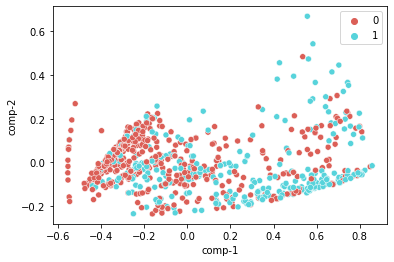

In [26]:
print('kPCA in 2d')
plot_2d(kPCA_2d, Y)

tSNE in 2d


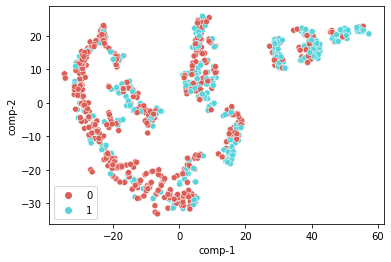

In [27]:
print('tSNE in 2d')
plot_2d(tSNE_2d, Y)

AS it is seen from the plots, in two-dimensional space it is hard to find a patter that could differentiate classes.

There are might be cases when the pattern can not be noticed in 2d plane, therefore sometimes it will be usefull to plot the data in 3d plane

kPCA in 3d


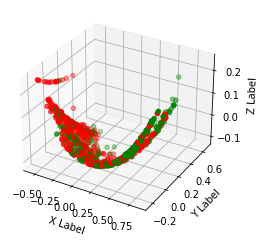

In [28]:
print('kPCA in 3d')
plot_3d(kPCA_3d, Y)

tSNE in 3d


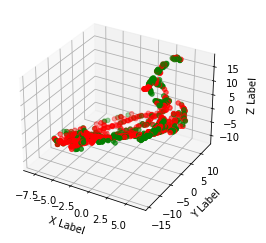

In [29]:
print('tSNE in 3d')
plot_3d(tSNE_3d, Y)

Here the pattern also could not be easily noticed. Nevertheless, to see how the reduced data can perform in classification algorithms, it will be passed to before mentioned algorithm functions.

Now there are four datasets obtained after dimensionality reduction:
1. kPCA with n_components = 2
2. tSNE with n_components = 2
3. kPCA with n_components = 3
4. tSNE with n_components = 3

All these four dataset will be passed to classification algorithms for further investigation and comparision with state-of-the-art classification algorithms with the data that was not reduced in terms of dimensionality

Training the data obtained after kPCA with 2 components

In [30]:
np.random.seed(42)
X_train, X_test, y_train, y_test= train_test_split(kPCA_2d, Y, random_state=100, test_size=0.2)
print('X_train_shape: ' + str(X_train.shape) + '\nX_test_shape: ' + str(X_test.shape)\
       + '\ny_train_shape: ' + str(y_train.shape) + '\ny_test_shape: ' + str(y_test.shape))

X_train_shape: (712, 2)
X_test_shape: (179, 2)
y_train_shape: (712,)
y_test_shape: (179,)


In [31]:
knn_train, knn_test = KNNTrainTest(X_train, y_train, X_test, y_test)
rf_train, rf_test = RandomForestTrainTest(X_train, y_train, X_test, y_test)
dt_train, dt_test = DecisionTreeTrainTest(X_train, y_train, X_test, y_test)
ab_train, ab_test = AdaBoostTrainTest(X_train, y_train, X_test, y_test)

results_kpca2d = pd.DataFrame({
    'Model': ['KNN',
              'Random Forest', 
              'Decision Tree', 
              'AdaBoost'],
    'Training Score': [knn_train, rf_train, dt_train, ab_train],
    'Test Score': [knn_test, rf_test, dt_test, ab_test]})
results_kpca2d

,Model,Training Score,Test Score
0,KNN,80.20,65.36
1,Random Forest,99.02,67.60
2,Decision Tree,99.02,62.01
3,AdaBoost,74.30,67.04


Training the data obtained after tSNE with 2 components

In [32]:
np.random.seed(42)
X_train, X_test, y_train, y_test= train_test_split(tSNE_2d, Y, random_state=100, test_size=0.2)
print('X_train_shape: ' + str(X_train.shape) + '\nX_test_shape: ' + str(X_test.shape)\
       + '\ny_train_shape: ' + str(y_train.shape) + '\ny_test_shape: ' + str(y_test.shape))

X_train_shape: (712, 2)
X_test_shape: (179, 2)
y_train_shape: (712,)
y_test_shape: (179,)


In [33]:
knn_train, knn_test = KNNTrainTest(X_train, y_train, X_test, y_test)
rf_train, rf_test = RandomForestTrainTest(X_train, y_train, X_test, y_test)
dt_train, dt_test = DecisionTreeTrainTest(X_train, y_train, X_test, y_test)
ab_train, ab_test = AdaBoostTrainTest(X_train, y_train, X_test, y_test)

results_tsne2d = pd.DataFrame({
    'Model': ['KNN',
              'Random Forest', 
              'Decision Tree', 
              'AdaBoost'],
    'Training Score': [knn_train, rf_train, dt_train, ab_train],
    'Test Score': [knn_test, rf_test, dt_test, ab_test]})
results_tsne2d

,Model,Training Score,Test Score
0,KNN,83.43,66.48
1,Random Forest,99.86,67.04
2,Decision Tree,99.86,68.16
3,AdaBoost,72.61,68.72


Training the data obtained after kPCA with 3 components

In [34]:
np.random.seed(42)
X_train, X_test, y_train, y_test= train_test_split(kPCA_3d, Y, random_state=100, test_size=0.2)
print('X_train_shape: ' + str(X_train.shape) + '\nX_test_shape: ' + str(X_test.shape)\
       + '\ny_train_shape: ' + str(y_train.shape) + '\ny_test_shape: ' + str(y_test.shape))

X_train_shape: (712, 3)
X_test_shape: (179, 3)
y_train_shape: (712,)
y_test_shape: (179,)


In [35]:
knn_train, knn_test = KNNTrainTest(X_train, y_train, X_test, y_test)
rf_train, rf_test = RandomForestTrainTest(X_train, y_train, X_test, y_test)
dt_train, dt_test = DecisionTreeTrainTest(X_train, y_train, X_test, y_test)
ab_train, ab_test = AdaBoostTrainTest(X_train, y_train, X_test, y_test)

results_kpca3d = pd.DataFrame({
    'Model': ['KNN',
              'Random Forest', 
              'Decision Tree', 
              'AdaBoost'],
    'Training Score': [knn_train, rf_train, dt_train, ab_train],
    'Test Score': [knn_test, rf_test, dt_test, ab_test]})
results_kpca3d

,Model,Training Score,Test Score
0,KNN,81.32,65.92
1,Random Forest,99.02,66.48
2,Decision Tree,99.02,58.66
3,AdaBoost,74.86,65.92


Training the data obtained after tSNE with 3 components

In [36]:
np.random.seed(42)
X_train, X_test, y_train, y_test= train_test_split(tSNE_3d, Y, random_state=100, test_size=0.2)
print('X_train_shape: ' + str(X_train.shape) + '\nX_test_shape: ' + str(X_test.shape)\
       + '\ny_train_shape: ' + str(y_train.shape) + '\ny_test_shape: ' + str(y_test.shape))

X_train_shape: (712, 3)
X_test_shape: (179, 3)
y_train_shape: (712,)
y_test_shape: (179,)


In [37]:
knn_train, knn_test = KNNTrainTest(X_train, y_train, X_test, y_test)
rf_train, rf_test = RandomForestTrainTest(X_train, y_train, X_test, y_test)
dt_train, dt_test = DecisionTreeTrainTest(X_train, y_train, X_test, y_test)
ab_train, ab_test = AdaBoostTrainTest(X_train, y_train, X_test, y_test)

results_tsne3d = pd.DataFrame({
    'Model': ['KNN',
              'Random Forest', 
              'Decision Tree', 
              'AdaBoost'],
    'Training Score': [knn_train, rf_train, dt_train, ab_train],
    'Test Score': [knn_test, rf_test, dt_test, ab_test]})
results_tsne3d

,Model,Training Score,Test Score
0,KNN,83.43,65.92
1,Random Forest,99.72,69.83
2,Decision Tree,99.72,66.48
3,AdaBoost,74.72,65.36


#### ANALYSIS

Below are the results of all calculations

In [38]:
print('Table 1. Standard classification')
results_clf

Table 1. Standard classification


,Model,Training Score,Test Score
0,KNN,83.99,70.39
1,Random Forest,99.02,83.24
2,Decision Tree,99.02,77.09
3,AdaBoost,83.99,82.12


In [39]:
print('Table 2. 2d kPCA classification')
results_kpca2d

Table 2. 2d kPCA classification


,Model,Training Score,Test Score
0,KNN,80.20,65.36
1,Random Forest,99.02,67.60
2,Decision Tree,99.02,62.01
3,AdaBoost,74.30,67.04


In [40]:
print('Table 3. 2d tSNE classification')
results_tsne2d

Table 3. 2d tSNE classification


,Model,Training Score,Test Score
0,KNN,83.43,66.48
1,Random Forest,99.86,67.04
2,Decision Tree,99.86,68.16
3,AdaBoost,72.61,68.72


In [41]:
print('Table 4. 3d kPCA classification')
results_kpca3d

Table 4. 3d kPCA classification


,Model,Training Score,Test Score
0,KNN,81.32,65.92
1,Random Forest,99.02,66.48
2,Decision Tree,99.02,58.66
3,AdaBoost,74.86,65.92


In [42]:
print('Table 5. 3d tSNE classification')
results_tsne3d

Table 5. 3d tSNE classification


,Model,Training Score,Test Score
0,KNN,83.43,65.92
1,Random Forest,99.72,69.83
2,Decision Tree,99.72,66.48
3,AdaBoost,74.72,65.36


The first fact that is noticeable is that in the case of all 5 tables the training score of both Random Forest and Decision Tree remains the same by fluctuating between 99 and 100. In the case of KNN, the same score does not change from the standard one, in dimensionality reduction the training score decreased to 81.6%, while in AdaBoost a significant drop is noticed. In standard cases, it outputs 83% of accuracy on the training set, but once the dimension is reduced, this score dropped by almost 10%. 

The case with test scores is different. It has shown the highest values for knn, random forest, and decision tree in standard classification, but once the dimension was reduced the classification algorithms started to perform not that well. Also, there is a significant difference between training scores and test scores in all classifications in tables 2-5. The difference can reach up to 35%. It might be the result of not performing hyperparameter optimization. And as the value of the training score is much larger than the test score, it can be an indication of underfitting.

The overview of results can be finalized as follows: Even the advantage that dimensionality reduction techniques give, using them in consecutive classification might not show that significant difference if the standard classification was applied on preprocessed data with no dimensionality reduction. 

Undoubtedly, dimensionality reduction techniques are useful algorithms to visualize the data in 2d and 3d planes and could be useful to use in classification in particular cases, however, in this research where the Titanic dataset is used, the implementation of both tSNE and kPCA in 2d and 3d plane shows not satisfactory results. Standard classification algorithms show more sufficient results. 
The possible reasons for obtaining such results could be:
1. Not implementing hyperparameter optimization both on classification and dimensionality reduction algorithms. 
2. There might be wrong assumptions on the data preprocessing part. 
3. Normalization could have an influence. 

#### CONCLUSION

In this project a new approach to solving the Titanic problem was present. The titanic dataset is one of the popular datasets on the Kaggle platform to test and experiment with different hypothesizes. The different way of solution in this project was to implement non-linear dimensionality reduction and observe how the reduction could affect training accuracy. Both kernel PCA and t-distributed Stochastic Neighbor Embedding on 2d and 3d planes were visualized. The assumption was tested with knn, random forest, decision tree, and AdaBoost algorithms. Finally, the implementations show that despite the ability to visually present data of Titanic problem the dimensionality reduction technique could not positively influence the classification accuracy, the result was lower than the direct implementation of algorithms on the preprocessed dataset.  

#### REFERENCES

[1] C.Tauchert, P.Buxmann, and J.Lambinus, "Crowdsourcing Data Science: A Qualitative Analysis of Organizations’ Usage of Kaggle Competitions," in <i>53rd Hawaii International Conference on System Sciences</i>, 2020, pp.229-238, doi: 	10.24251/HICSS.2020.029

[2] E.Ekinci, S.I.Omurca, and N.Acun, "A Comparative Study on Machine Learning
Techniques using Titanic Dataset," in <i>7th International Conference on Advanced Technologies</i>, 2018, pp. 411-416. [Online], Available: https://www.researchgate.net/publication/324909545_A_Comparative_Study_on_Machine_Learning_Techniques_Using_Titanic_Dataset 

[3] S.Cicoria, J.Sherlock, M.Muniswamaiah, and L.Clarke, "Classification of Titanic Passenger Data
and Chances of Surviving the Disaster," in <i>Student-Faculty Research Day</i>, 2014. [Online], Available: https://www.researchgate.net/publication/328474979_Classification_of_Titanic_Passenger_Data_and_Chances_of_Surviving_the_Disaster

[4] A.Singh, S.Saraswat, and N.Faujdar, "Analyzing Titanic Disaster using Machine Learning Algorithms," in <i>International Conference on Computing, Communication and Automation (ICCCA2017)</i>, 2017, pp. 406-411, doi: 10.1109/CCAA.2017.8229835 

[5] H.Singh, “Applying CNN over Titanic data-set using Keras,” Medium, 19-Jul-2018. [Online]. Available: https://medium.com/black-feathers-labs/applying-cnn-over-titanic-data-set-using-keras-ee07d70b0222 

[6] A.George, "Anomaly Detection based on Machine Learning: Dimensionality Reduction using PCA and Classification using SVM," in <i>International Journal of Computer Applications (0975 – 8887)</i>, vol. 47, no. 21, pp. 5-8, Jun.2012. 

[7] D.A.A.G.Singh, E.J.Leavline, R.Priyanka, and P.P.Priya, "Dimensionality Reduction using Genetic Algorithm for Improving Accuracy in Medical Diagnosis," in <i>International Journal of Intelligent Systems and Applications (IJISA)</i>, vol. 8,
no. 1, pp. 67-73, 2016. DOI: 10.5815/ijisa.2016.01.08 

[8] A.Bibal, G.Nanfack, and B.Frénay, "Explaining t-SNE Embeddings Locally by Adapting LIME," in <i>ESANN</i>, Oct.2020. [Online], Available: https://www.researchgate.net/publication/350734585_Explaining_t-SNE_Embeddings_Locally_by_Adapting_LIME 

[9] A.Gisbrecht, A.Schulz, and B.Hammer, "Parametric nonlinear dimensionality reduction using kernel t-SNE," in <i>Neurocomputing</i>, vol. 147, no. 1, pp. 71-82. Jan.2015. doi: 10.1016/j.neucom.2013.11.045 

[10] H.Hoffmann, "Kernel PCA for Novelty Detection," in <i>Pattern Recognition</i>, vol. 40, no. 3, pp. 863-874, Mar.2007. doi: 10.1016/j.patcog.2006.07.009

[11] N.Satour, B.Benyacoub, B.El Mahrad, and I.Kacimi, "KPCA over PCA to assess urban resilience to floods," in <i>E3S Web of Conferences</i>, 2021, pp. 1-6, doi: 10.1051/e3sconf/202131403005